In [1]:
from src.helper_functions import *

2025-10-07 03:14:05.100974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-07 03:14:05.205827: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-07 03:14:05.210595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-10-07 03:14:05.210615: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [2]:
# all_feature_cols = [
#         'Thickness (m)', 'Surface Slope (m)', 'Inflow Velocity (m/a)', 'Temperature (K)',
#         'C (Pa m^(1/3) a^(1/3))', 'Total Form Drag (Pa)', 'RMS Roughness (m)',
#         'Slope Roughness', 'Mean Velocity (m/a)'
#     ]
input_features = [
        'Thickness (m)', 'Surface Slope (m)', 'Temperature (K)',
        'C (Pa m^(1/3) a^(1/3))', 'RMS Roughness (m)',
        'Slope Roughness', 'Vel-x', 'Vel-y'
    ]

In [3]:
df = process_df(cutoff_velocity=1200,datafile='synthetic_ice_flow_parameters_test.csv')

Number of rows that didn't make the cut: 1032


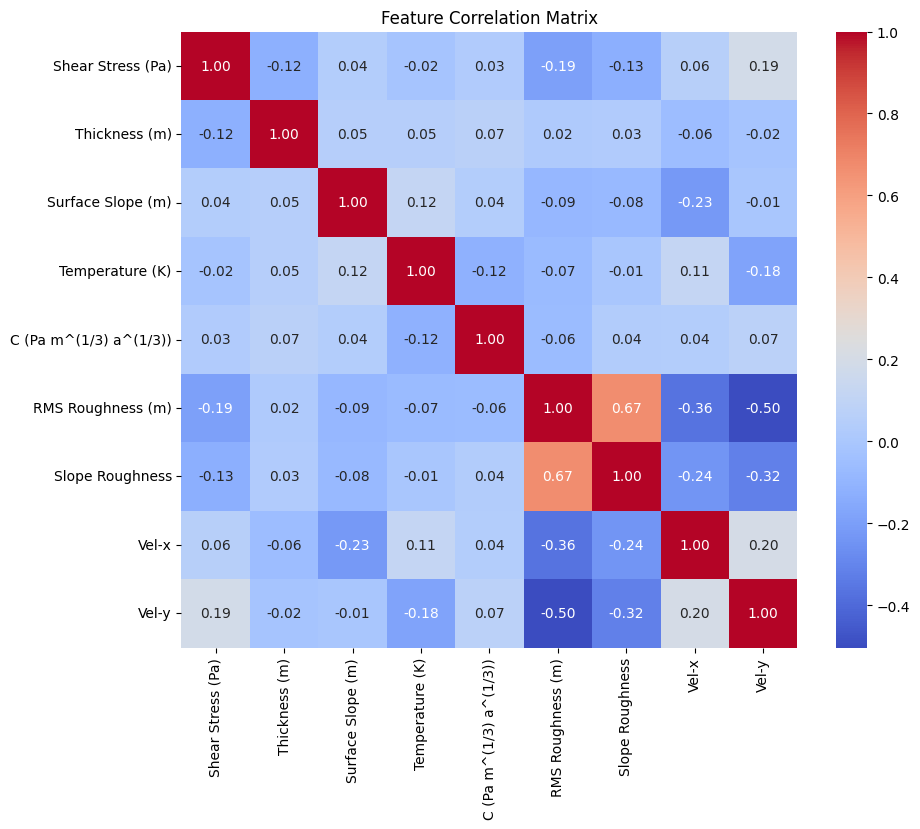

In [4]:
plot_corelation_matrix(df[['Shear Stress (Pa)'] +input_features])

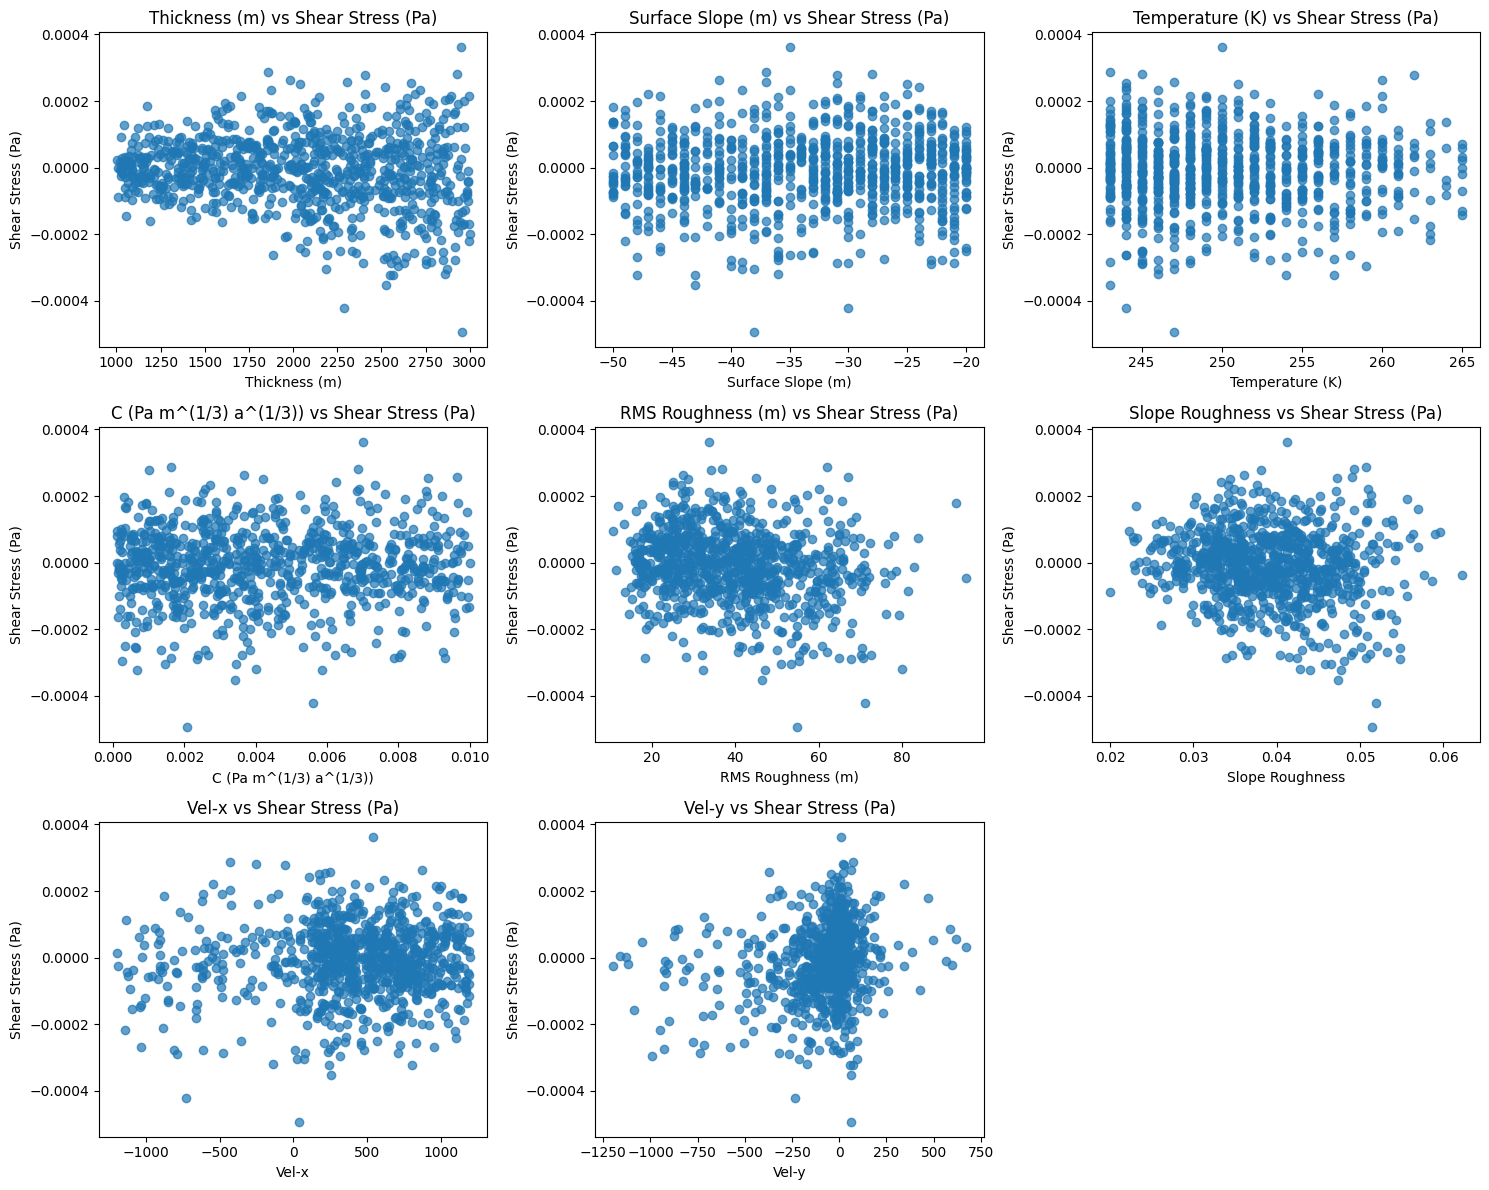

In [5]:
scatter_plot_features_vs_target(df, input_features, target_col='Shear Stress (Pa)')

Number of rows that didn't make the cut: 1032


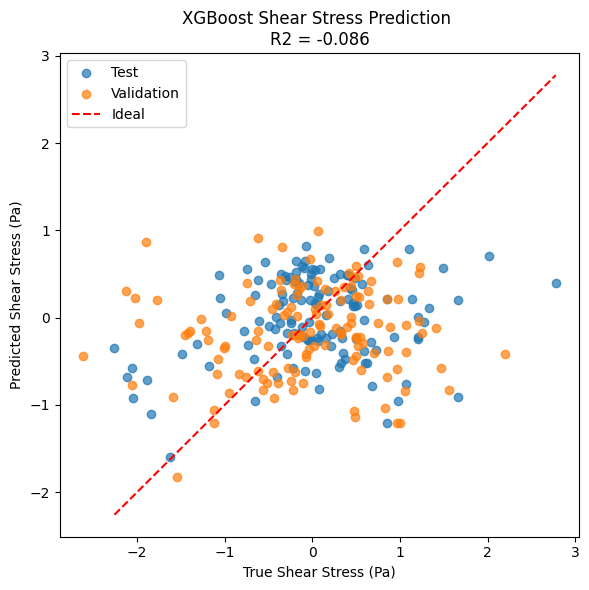

In [6]:
predictions = predict_shear_stress_xgb(input_features, n_estimators=500)